In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data/clean_choco_rating_dataset.csv')

In [3]:
data.head()

choco_bar_name company_name company_loc  rating  cocoa_perc    CQ  \
0           Nib Brittle         Theo         USA     2.5        65.0  57.0   
1           Ivory Coast         Theo         USA     4.0        75.0  53.0   
2  Ghana-Panama-Ecuador         Theo         USA     3.5        75.0  44.0   
3                Mad 65         Theo         USA     4.0        65.0  60.0   
4             85% Blend       Venchi       Italy     3.5        85.0  23.0   

   sweetness  acidity  bitterness  roast  intensity  complexity  structure  \
0       55.0     48.0        37.0   62.0       51.0        43.0       41.0   
1       42.0     40.0        49.0   71.0       37.0        36.0       80.0   
2       48.0     76.0        50.0   63.0       45.0        52.0       39.0   
3       56.0     76.0        20.0   68.0       64.0        62.0       83.0   
4       21.0      8.0        70.0   76.0       52.0        10.0       78.0   

   length  appearance  aroma  mouthfeel  flavor  quality  
0    29.0        74.0   72.0       72.0    81.4     83.0  
1    82.0        92.0   82.0       85.3    88.4     86.5  
2    81.0       100.0   80.0       82.0    86.4     87.0  
3    51.0       100.0   73.0       90.7    89.0     90.0  
4    69.0        92.0   84.0       83.3    84.2     82.5

In [4]:
#only get what you need
df = data.loc[:,'rating':]
df.head()

rating  cocoa_perc    CQ  sweetness  acidity  bitterness  roast  intensity  \
0     2.5        65.0  57.0       55.0     48.0        37.0   62.0       51.0   
1     4.0        75.0  53.0       42.0     40.0        49.0   71.0       37.0   
2     3.5        75.0  44.0       48.0     76.0        50.0   63.0       45.0   
3     4.0        65.0  60.0       56.0     76.0        20.0   68.0       64.0   
4     3.5        85.0  23.0       21.0      8.0        70.0   76.0       52.0   

   complexity  structure  length  appearance  aroma  mouthfeel  flavor  \
0        43.0       41.0    29.0        74.0   72.0       72.0    81.4   
1        36.0       80.0    82.0        92.0   82.0       85.3    88.4   
2        52.0       39.0    81.0       100.0   80.0       82.0    86.4   
3        62.0       83.0    51.0       100.0   73.0       90.7    89.0   
4        10.0       78.0    69.0        92.0   84.0       83.3    84.2   

   quality  
0     83.0  
1     86.5  
2     87.0  
3     90.0  
4     82.5

# Build a Baseline 

In [5]:
#baseline multi-linear regression model
df_Y = df['rating']
df_X = df.loc[:,'cocoa_perc':]

regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, df_X, df_Y, scoring='r2', cv=crossvalidation))
baseline

0.8341048608039572

In [6]:
import statsmodels.api as sm
df_sm = sm.add_constant(df_X)
results = sm.OLS(df_Y, df_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     496.0
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:00:20   Log-Likelihood:                -856.98
No. Observations:                1367   AIC:                             1746.
Df Residuals:                    1351   BIC:                             1829.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.8140      0.184    -26.163      0.000      -5.175      -4.453
cocoa_perc     0.0008      0.001      0.691      0.490      -0.001       0.003
CQ             0.0022      0.001      3.062      0.002       0.001       0.004
sweetness      0.0019      0.001      1.982      0.048    2.01e-05       0.004
acidity        0.0002      0.001      0.220      0.826      -0.001       0.002
bitterness   5.92e-05      0.001      0.066      0.947      -0.002       0.002
roast         -0.0009      0.001     -1.094      0.274      -0.002       0.001
intensity     -0.0008      0.001     -0.928      0.354      -0.002       0.001
complexity     0.0052      0.001      6.055      0.000       0.004       0.007
structure      0.0082      0.001      9.083      0.000       0.006       0.010
length        -0.0007      0.001     -0.647      0.518      -0.003       0.001
appearance     0.0054      0.001      5.587      0.000       0.004       0.007
aroma          0.0131      0.001     10.486      0.000       0.011       0.016
mouthfeel      0.0176      0.001     11.983      0.000       0.015       0.020
flavor         0.0356      0.002     19.260      0.000       0.032       0.039
quality        0.0154      0.001     10.918      0.000       0.013       0.018
==============================================================================
Omnibus:                      996.949   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            88252.063
Skew:                          -2.642   Prob(JB):                         0.00
Kurtosis:                      42.006   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Find Multicollinearity

In [7]:
#make config file
from config import plotly_username, plotly_api_key
import plotly 
plotly.tools.set_credentials_file(username=plotly_username, api_key=plotly_api_key)

import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go

In [8]:
#correlation heatmap of variables
corrs = df.corr()
colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], [1.0, 'rgb(49,54,149)']]
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True,
    colorscale=colorscale)

py.iplot(figure)

cocoa_perc and sweetness is moderately negavitely correlated <br>
sweetness and bitterness is moderately negatively correlated  <br>

cocoa_perc and bitterness is moderately positively correlated  <br>
complexity and flavor is is moderately positively correlated <br>
structure and complexity is moderately positively correlated <br>
structure and quality is moderately positively correlated <br>
flavor and quality is highly positively correlated  <br>

In [9]:
#check for anything above a collinearity of above 0.75, this indicates multicollinearity
multi_corr = abs(corrs) > 0.75
multi_corr

rating  cocoa_perc     CQ  sweetness  acidity  bitterness  roast  \
rating        True       False  False      False    False       False  False   
cocoa_perc   False        True  False      False    False       False  False   
CQ           False       False   True      False    False       False  False   
sweetness    False       False  False       True    False       False  False   
acidity      False       False  False      False     True       False  False   
bitterness   False       False  False      False    False        True  False   
roast        False       False  False      False    False       False   True   
intensity    False       False  False      False    False       False  False   
complexity   False       False  False      False    False       False  False   
structure    False       False  False      False    False       False  False   
length       False       False  False      False    False       False  False   
appearance   False       False  False      False    False       False  False   
aroma        False       False  False      False    False       False  False   
mouthfeel    False       False  False      False    False       False  False   
flavor        True       False  False      False    False       False  False   
quality       True       False  False      False    False       False  False   

            intensity  complexity  structure  length  appearance  aroma  \
rating          False       False      False   False       False  False   
cocoa_perc      False       False      False   False       False  False   
CQ              False       False      False   False       False  False   
sweetness       False       False      False   False       False  False   
acidity         False       False      False   False       False  False   
bitterness      False       False      False   False       False  False   
roast           False       False      False   False       False  False   
intensity        True       False      False   False       False  False   
complexity      False        True      False   False       False  False   
structure       False       False       True   False       False  False   
length          False       False      False    True       False  False   
appearance      False       False      False   False        True  False   
aroma           False       False      False   False       False   True   
mouthfeel       False       False      False   False       False  False   
flavor          False       False      False   False       False  False   
quality         False       False      False   False       False  False   

            mouthfeel  flavor  quality  
rating          False    True     True  
cocoa_perc      False   False    False  
CQ              False   False    False  
sweetness       False   False    False  
acidity         False   False    False  
bitterness      False   False    False  
roast           False   False    False  
intensity       False   False    False  
complexity      False   False    False  
structure       False   False    False  
length          False   False    False  
appearance      False   False    False  
aroma           False   False    False  
mouthfeel        True   False    False  
flavor          False    True     True  
quality         False    True     True

In [10]:
multi_corr[multi_corr == True]

rating  cocoa_perc   CQ  sweetness  acidity  bitterness  roast  \
rating         1.0         NaN  NaN        NaN      NaN         NaN    NaN   
cocoa_perc     NaN         1.0  NaN        NaN      NaN         NaN    NaN   
CQ             NaN         NaN  1.0        NaN      NaN         NaN    NaN   
sweetness      NaN         NaN  NaN        1.0      NaN         NaN    NaN   
acidity        NaN         NaN  NaN        NaN      1.0         NaN    NaN   
bitterness     NaN         NaN  NaN        NaN      NaN         1.0    NaN   
roast          NaN         NaN  NaN        NaN      NaN         NaN    1.0   
intensity      NaN         NaN  NaN        NaN      NaN         NaN    NaN   
complexity     NaN         NaN  NaN        NaN      NaN         NaN    NaN   
structure      NaN         NaN  NaN        NaN      NaN         NaN    NaN   
length         NaN         NaN  NaN        NaN      NaN         NaN    NaN   
appearance     NaN         NaN  NaN        NaN      NaN         NaN    NaN   
aroma          NaN         NaN  NaN        NaN      NaN         NaN    NaN   
mouthfeel      NaN         NaN  NaN        NaN      NaN         NaN    NaN   
flavor         1.0         NaN  NaN        NaN      NaN         NaN    NaN   
quality        1.0         NaN  NaN        NaN      NaN         NaN    NaN   

            intensity  complexity  structure  length  appearance  aroma  \
rating            NaN         NaN        NaN     NaN         NaN    NaN   
cocoa_perc        NaN         NaN        NaN     NaN         NaN    NaN   
CQ                NaN         NaN        NaN     NaN         NaN    NaN   
sweetness         NaN         NaN        NaN     NaN         NaN    NaN   
acidity           NaN         NaN        NaN     NaN         NaN    NaN   
bitterness        NaN         NaN        NaN     NaN         NaN    NaN   
roast             NaN         NaN        NaN     NaN         NaN    NaN   
intensity         1.0         NaN        NaN     NaN         NaN    NaN   
complexity        NaN         1.0        NaN     NaN         NaN    NaN   
structure         NaN         NaN        1.0     NaN         NaN    NaN   
length            NaN         NaN        NaN     1.0         NaN    NaN   
appearance        NaN         NaN        NaN     NaN         1.0    NaN   
aroma             NaN         NaN        NaN     NaN         NaN    1.0   
mouthfeel         NaN         NaN        NaN     NaN         NaN    NaN   
flavor            NaN         NaN        NaN     NaN         NaN    NaN   
quality           NaN         NaN        NaN     NaN         NaN    NaN   

            mouthfeel  flavor  quality  
rating            NaN     1.0      1.0  
cocoa_perc        NaN     NaN      NaN  
CQ                NaN     NaN      NaN  
sweetness         NaN     NaN      NaN  
acidity           NaN     NaN      NaN  
bitterness        NaN     NaN      NaN  
roast             NaN     NaN      NaN  
intensity         NaN     NaN      NaN  
complexity        NaN     NaN      NaN  
structure         NaN     NaN      NaN  
length            NaN     NaN      NaN  
appearance        NaN     NaN      NaN  
aroma             NaN     NaN      NaN  
mouthfeel         1.0     NaN      NaN  
flavor            NaN     1.0      1.0  
quality           NaN     1.0      1.0

flavor and quality are the only variables that have high correlational value. This indicates a possible multicollinearity. However, both flavor and quality are both also highly correlated with the target variable, rating. Thus, I will keep both variables.

# Find Interactions

In [11]:
#look at the r^2 of all the combinations
from itertools import combinations

#create list of 2 column combinations
combinations = list(combinations(df_X.columns, 2))

#get the r^2 of each combination
interactions = []
X_copy = df_X.copy()
for col1, col2 in combinations:
    X_copy['interaction'] = X_copy[col1] * X_copy[col2]
    #use the same regression and crossvalidation
    baseline = np.mean(cross_val_score(regression, X_copy, df_Y, scoring='r2', cv=crossvalidation))
    #add new tuple with r^2 to list
    interactions.append((col1, col2, baseline))
#sort by highest r^2
interactions = sorted(interactions, key=lambda tup: tup[2], reverse=True)
interactions[:5]

#scratch this idea

[('complexity', 'flavor', 0.8507587894662045),
 ('structure', 'aroma', 0.842976052806635),
 ('length', 'flavor', 0.8425704432929036),
 ('CQ', 'aroma', 0.8394203856409479),
 ('aroma', 'mouthfeel', 0.8388107494381419)]

aroma is one of the predictors with the highest effects on R^2 by being in 3 out of the top 5 combinations with having a high R^2. I will look into the interactions of aroma and structure, aroma and CQ, and aroma and mouthfeel.

#### Look for Interactions

In [12]:
#seperate the dataframe into 3 different dataframes of 33%,between 33% and 66%, and everything over
#based on a specified column
def create_bins(var_bin_name):
    #greater than the 67%
    df_high = df[df[var_bin_name] > np.percentile(df[var_bin_name], 67)]
    #between the 33% and 67%
    df_med = df[(df[var_bin_name] <= np.percentile(df[var_bin_name], 67)) & 
             (df[var_bin_name] > np.percentile(df[var_bin_name], 33))]
    #less than the 33%
    df_low = df[df[var_bin_name] <= np.percentile(df[var_bin_name], 33)]
    
    return df_high, df_med, df_low

In [13]:
#create an interaction model by portioning the dataframe based on a column and looking at the iteraction
#on a specified column
#takes in interaction column and sectioning column
def create_interaction(var_name, var_bin_name):
    #seperate the dataframe into 3 different dataframes of 33%,between 33% and 66%, and everything over
    df_high, df_med, df_low = create_bins(var_bin_name)
    print("df_high.shape: ", df_high.shape)
    print("df_med.shape: ",df_med.shape)
    print("df_low.shape: ",df_low.shape)
    
    #make regression line for seperate portions
    regression_h = LinearRegression()
    regression_m = LinearRegression()
    regression_l = LinearRegression()
    
    regression_h.fit(df_high[var_name].values.reshape(-1, 1), df_high['rating'])
    regression_m.fit(df_med[var_name].values.reshape(-1, 1), df_med['rating'])
    regression_l.fit(df_low[var_name].values.reshape(-1, 1), df_low['rating'])
    
    print("regression_h.coef_: ", regression_h.coef_) 
    print("regression_m.coef_: ", regression_m.coef_)
    print("regression_l.coef_: ", regression_l.coef_)

    #make predictions
    pred_h = regression_h.predict(df_high[var_name].values.reshape(-1, 1))
    pred_m = regression_m.predict(df_med[var_name].values.reshape(-1, 1))
    pred_l = regression_l.predict(df_low[var_name].values.reshape(-1, 1))
    
    #plot
    plt.figure(figsize=(15,8))
    plt.scatter(df_high[var_name], df_high['rating'], color='blue', alpha=0.3, label="above 66% in {}".format(var_bin_name))
    plt.scatter(df_med[var_name], df_med['rating'], color='orange', alpha=0.3, label="between 33% and 66% in {}".format(var_bin_name))
    plt.scatter(df_low[var_name], df_low['rating'], color='red', alpha=0.3, label="bottom 33% in {}".format(var_bin_name))
    #plot predicted lines
    plt.plot(df_high[var_name], pred_h, color='blue', lw=2)
    plt.plot(df_med[var_name], pred_m, color='orange', lw=2)
    plt.plot(df_low[var_name], pred_l, color='red', lw=2)
    
    
    plt.title('Interaction between {} and {}'.format(var_bin_name, var_name), fontsize=20)
    plt.ylabel('rating', fontsize=20)
    plt.yticks(fontsize=16)
    plt.xlabel(var_name, fontsize=20)
    plt.xticks(fontsize=16)
    plt.legend(prop={'size': 12})
    plt.show()

#### Test the Interactions

df_high.shape:  (427, 16)
df_med.shape:  (445, 16)
df_low.shape:  (495, 16)
regression_h.coef_:  [0.03334039]
regression_m.coef_:  [0.03300401]
regression_l.coef_:  [0.03817462]


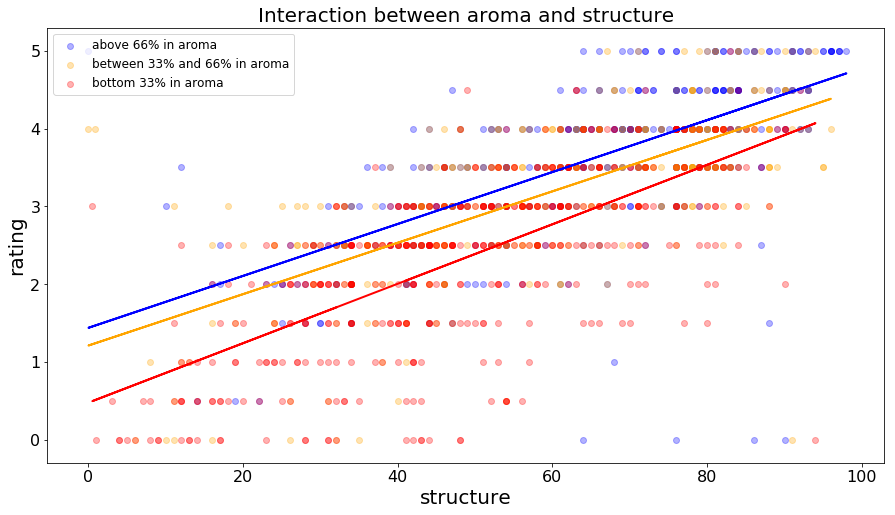

In [14]:
create_interaction('structure', 'aroma')

looks like a low interaction but an interaction none the less <br>

Rating is more affected by structure when there is a high aroma score

df_high.shape:  (427, 16)
df_med.shape:  (445, 16)
df_low.shape:  (495, 16)
regression_h.coef_:  [0.01693342]
regression_m.coef_:  [0.01724495]
regression_l.coef_:  [0.01906958]


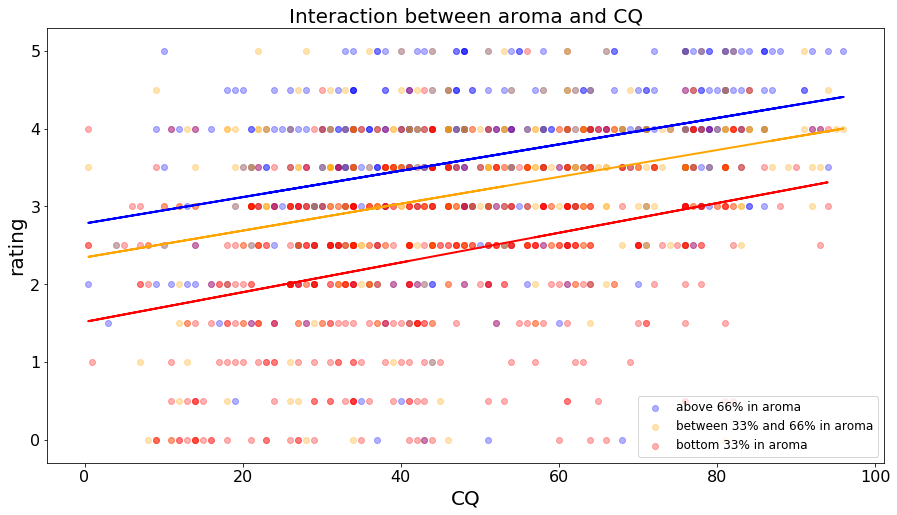

In [15]:
create_interaction('CQ', 'aroma')

looks like there is NO interaction <br>

rating is more affected by CQ when there is a high aroma score

df_high.shape:  (434, 16)
df_med.shape:  (453, 16)
df_low.shape:  (480, 16)
regression_h.coef_:  [0.05033761]
regression_m.coef_:  [0.04495104]
regression_l.coef_:  [0.04207431]


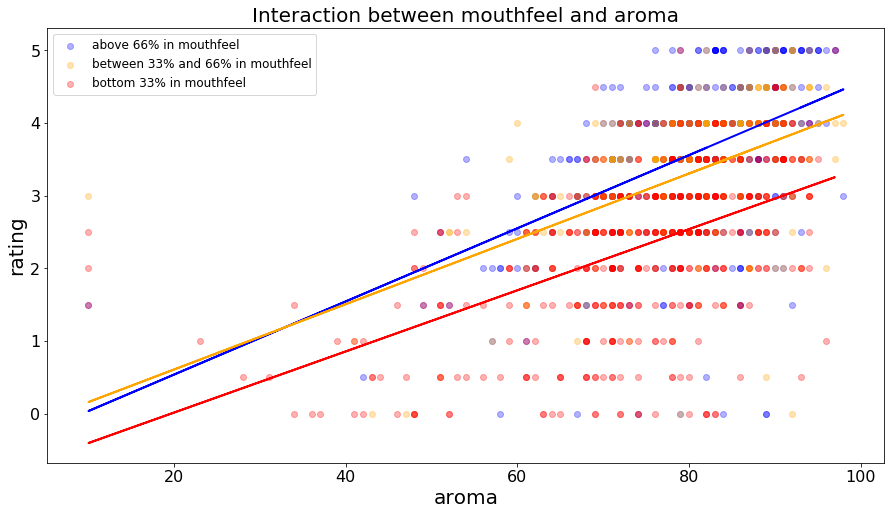

In [16]:
create_interaction('aroma', 'mouthfeel')

looks to have an interaction <br>

when the aroma score is low, having a balanced mouthfeel score produces the highest ratings however, after around an aroma score of 35, then rating is strongly affected by an aroma score with a high moutfeel score.

we should look at the other combinations with high R^2 while we're at it since the other 2 combinations both contained flavor

df_high.shape:  (445, 16)
df_med.shape:  (459, 16)
df_low.shape:  (463, 16)
regression_h.coef_:  [0.00276426]
regression_m.coef_:  [0.0083792]
regression_l.coef_:  [0.00424768]


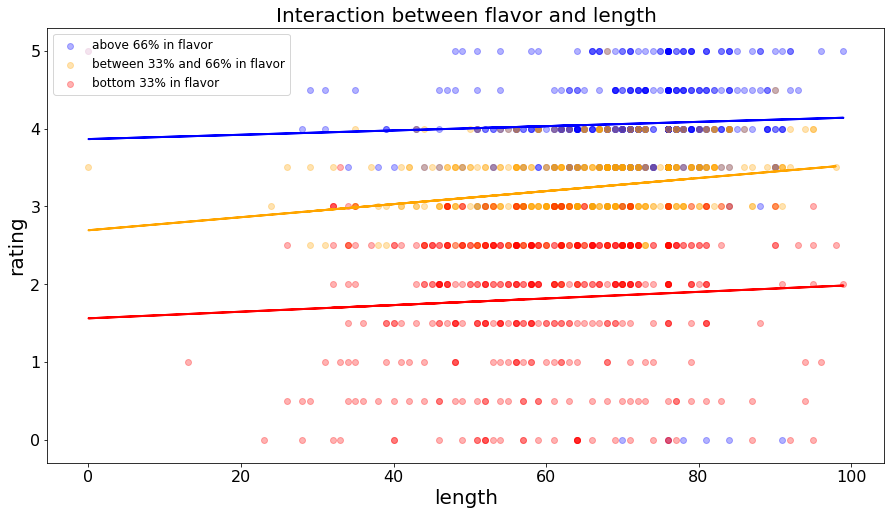

In [17]:
create_interaction('length', 'flavor')

There is an interaction <br>

Rating is more affected by length with a high flavor score

df_high.shape:  (445, 16)
df_med.shape:  (459, 16)
df_low.shape:  (463, 16)
regression_h.coef_:  [0.00613931]
regression_m.coef_:  [0.00691476]
regression_l.coef_:  [0.02313867]


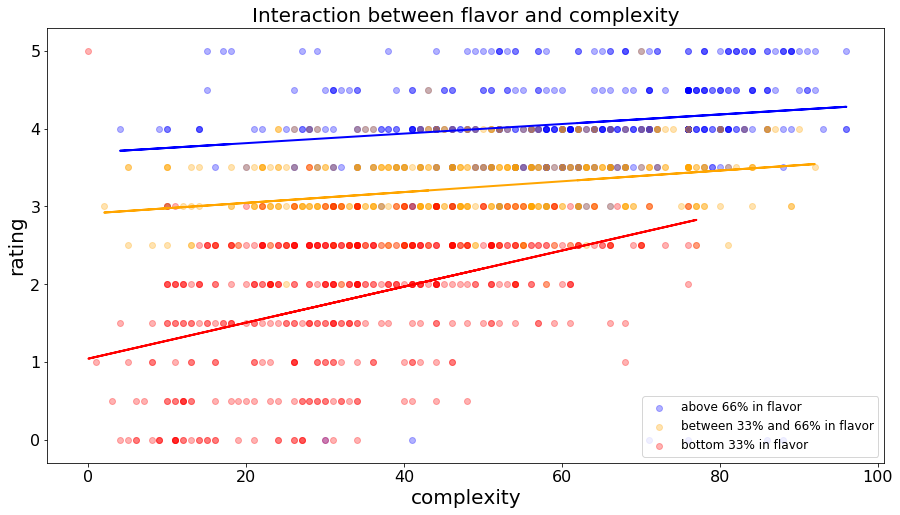

In [18]:
create_interaction('complexity', 'flavor')

There is an interaction

Rating is more strongly affected by complexity with a high flavor score.

### Combine Interactions into dataframe

In [19]:
#build another multi-linear regression model to compare with our baseline
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

df_inter = df.copy()
#add the interaction columns
df_inter['aroma_struct'] = df_inter['aroma'] * df_inter['structure']
df_inter['aroma_mouthfeel'] = df_inter['aroma'] * df_inter['mouthfeel']
df_inter['flavor_length'] = df_inter['flavor'] * df_inter['length']
df_inter['flavor_compl'] = df_inter['flavor'] * df_inter['complexity']

#seperate X matrix and Y matrix
df_inter.head()
df_inter_Y = df_inter['rating']
df_inter_X = df_inter.loc[:,'cocoa_perc':]

model_inter = np.mean(cross_val_score(regression, df_inter_X, df_inter_Y, scoring='r2', cv=crossvalidation))
model_inter

0.8582567522286493

In [20]:
import statsmodels.api as sm
df_inter_sm = sm.add_constant(df_inter_X)
results = sm.OLS(df_inter_Y, df_inter_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     470.1
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:00:29   Log-Likelihood:                -748.06
No. Observations:                1367   AIC:                             1536.
Df Residuals:                    1347   BIC:                             1641.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0597      0.507      0.118      0.906      -0.936       1.055
cocoa_perc          0.0006      0.001      0.632      0.528      -0.001       0.003
CQ                  0.0019      0.001      2.863      0.004       0.001       0.003
sweetness           0.0011      0.001      1.183      0.237      -0.001       0.003
acidity             0.0009      0.001      1.331      0.184      -0.000       0.002
bitterness          0.0005      0.001      0.648      0.517      -0.001       0.002
roast              -0.0003      0.001     -0.387      0.699      -0.002       0.001
intensity          -0.0008      0.001     -0.998      0.319      -0.002       0.001
complexity         -0.0347      0.005     -6.924      0.000      -0.045      -0.025
structure          -0.0139      0.004     -3.176      0.002      -0.022      -0.005
length             -0.0267      0.004     -5.959      0.000      -0.036      -0.018
appearance          0.0067      0.001      7.391      0.000       0.005       0.008
aroma              -0.0231      0.006     -3.656      0.000      -0.035      -0.011
mouthfeel          -0.0036      0.006     -0.574      0.566      -0.016       0.009
flavor              0.0085      0.003      2.583      0.010       0.002       0.015
quality             0.0170      0.001     12.630      0.000       0.014       0.020
aroma_struct        0.0002    5.5e-05      4.293      0.000       0.000       0.000
aroma_mouthfeel     0.0003   8.32e-05      3.538      0.000       0.000       0.000
flavor_length       0.0003   5.58e-05      5.827      0.000       0.000       0.000
flavor_compl        0.0004   5.77e-05      7.737      0.000       0.000       0.001
==============================================================================
Omnibus:                     1400.490   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           203036.248
Skew:                          -4.520   Prob(JB):                         0.00
Kurtosis:                      62.016   Cond. No.                     4.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

original baseline = 0.8341048608039572 <br>
orignal statsmodel R-squared = 0.846 <br>

Our new R^2 went up from our raw baseline model

### Check for heteroscedasticity

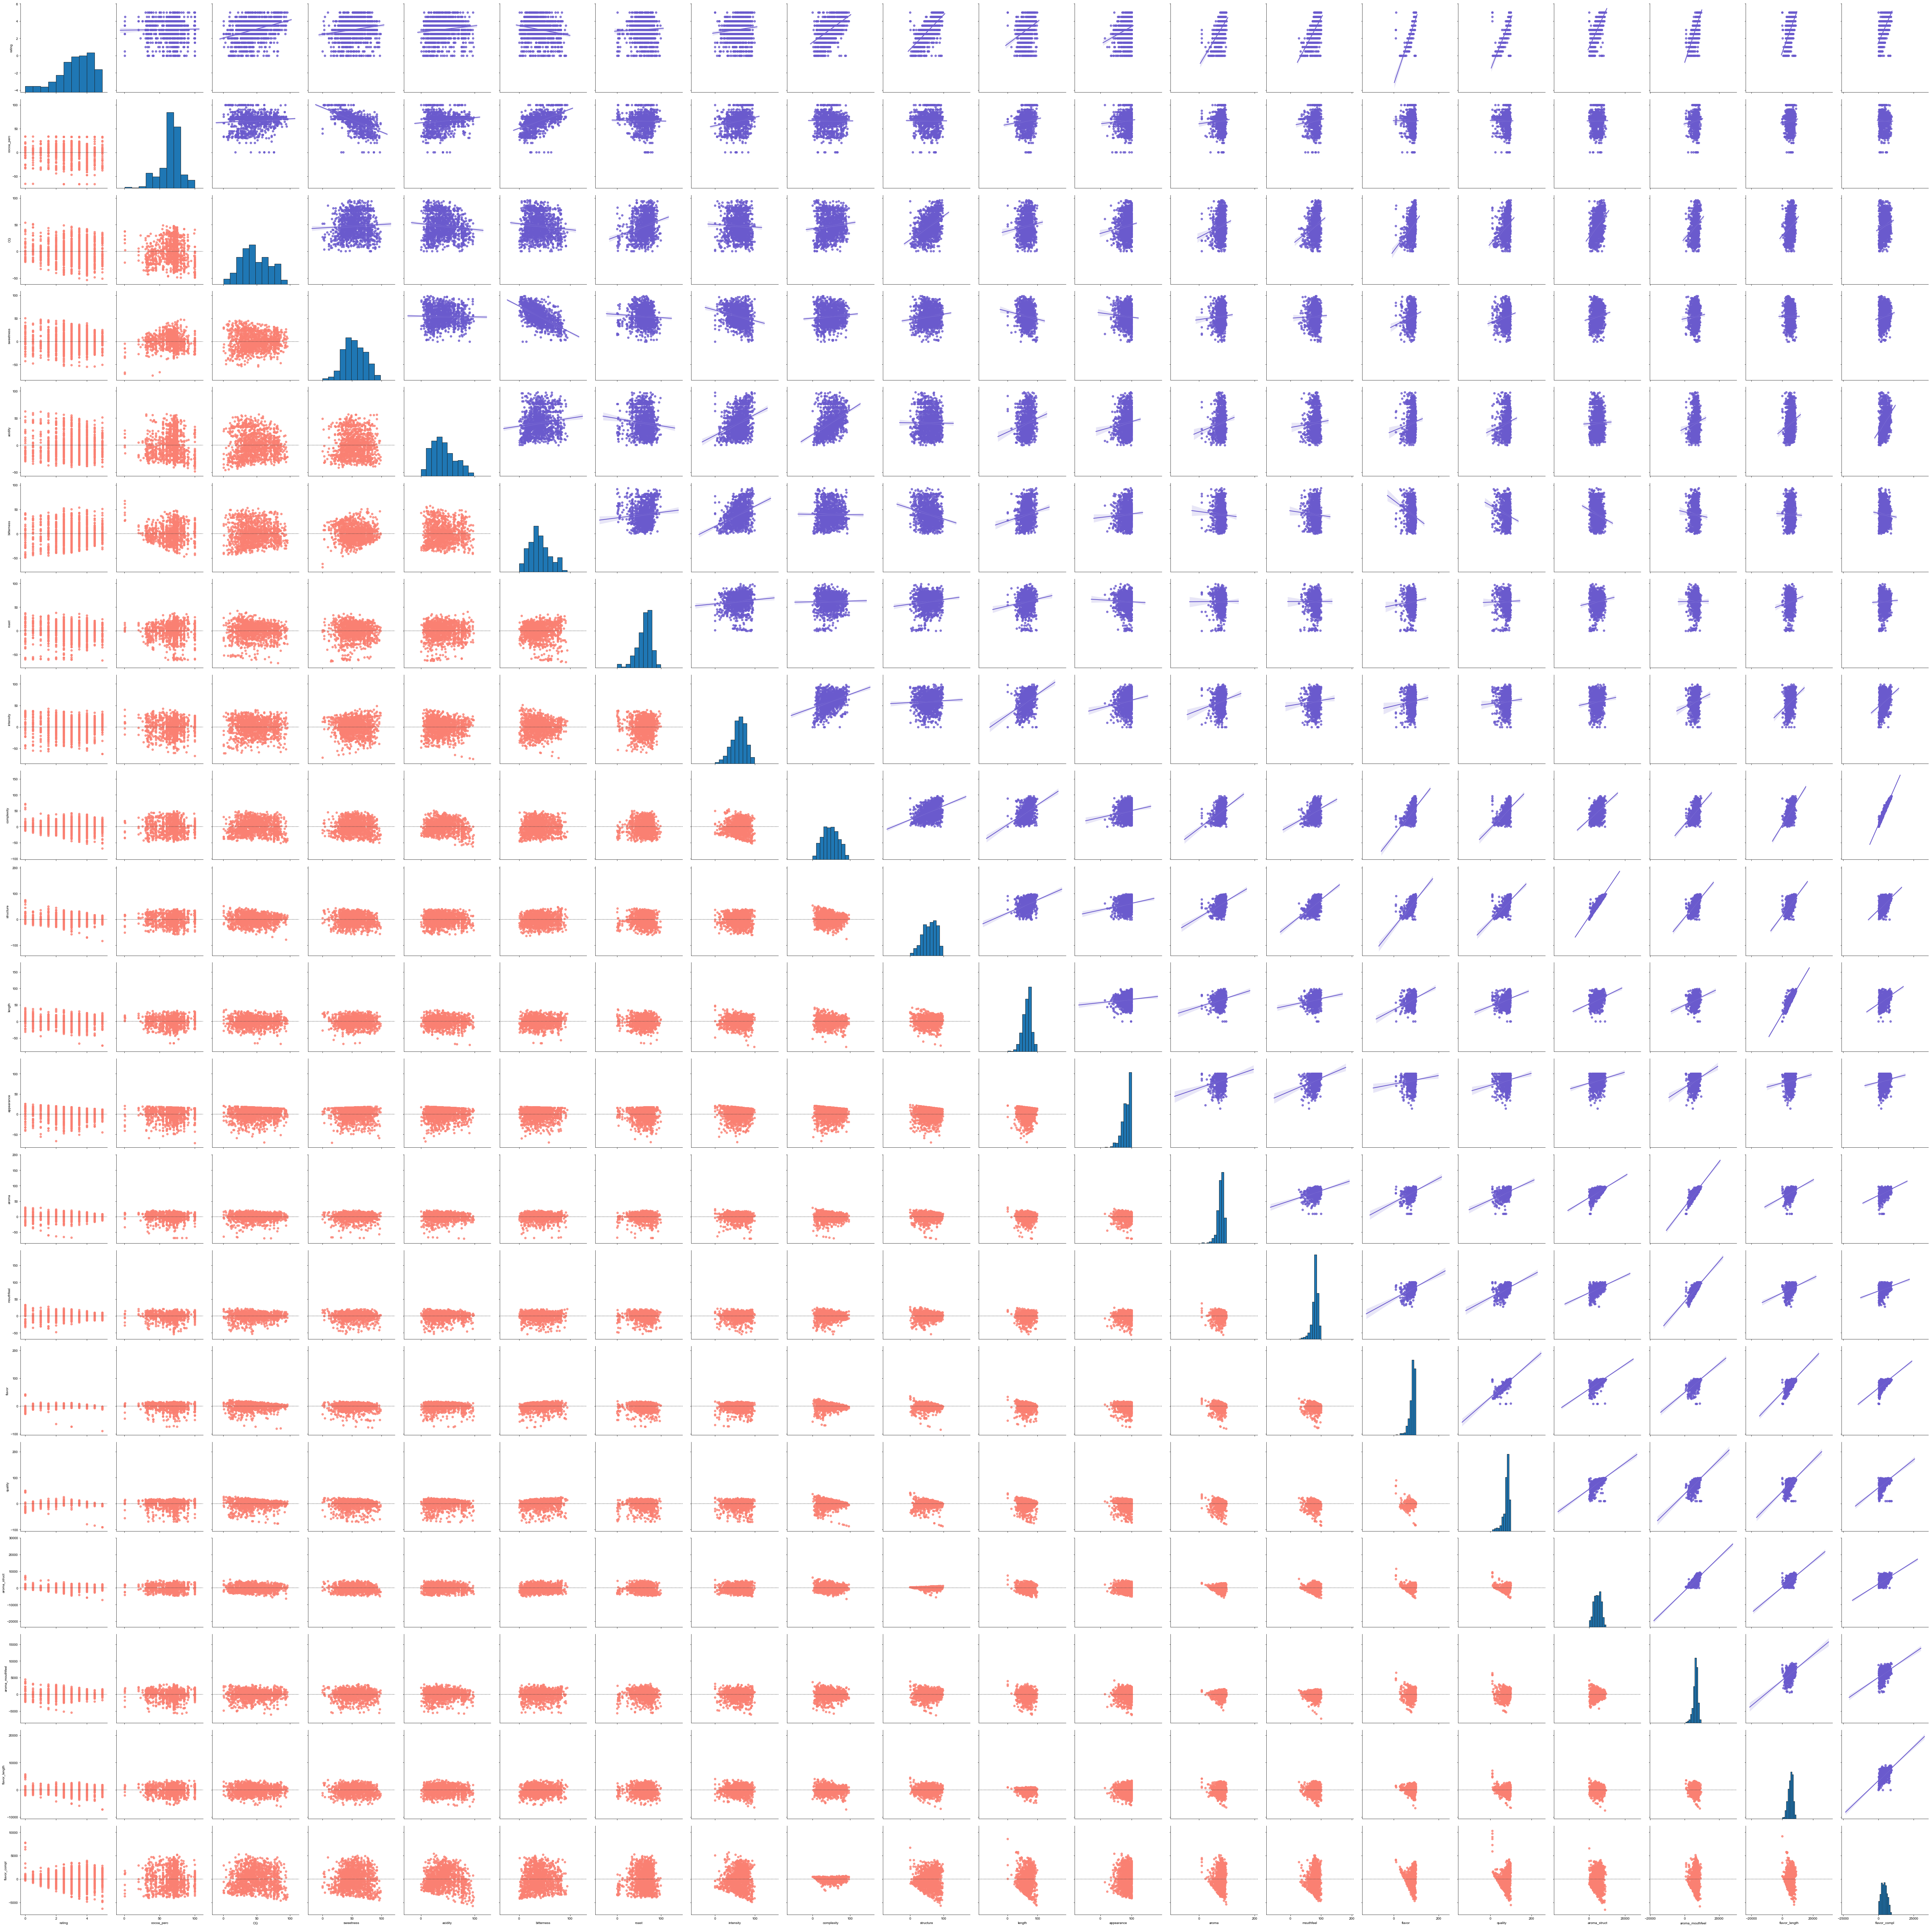

In [21]:
grid = sns.PairGrid(data=df_inter,
                    height = 4)
sns.set(font_scale=2)
# Map the plots to the locations
grid = grid.map_lower(sns.residplot, color='salmon')
grid = grid.map_upper(sns.regplot, color='slateblue')
grid = grid.map_diag(plt.hist, bins=10, edgecolor='k');

might be hard to see but cocoa_perc is very heteroscedastic <br>

we can transform this through log transformation

lets take a closer look at the residuals compared to the target variable, rating

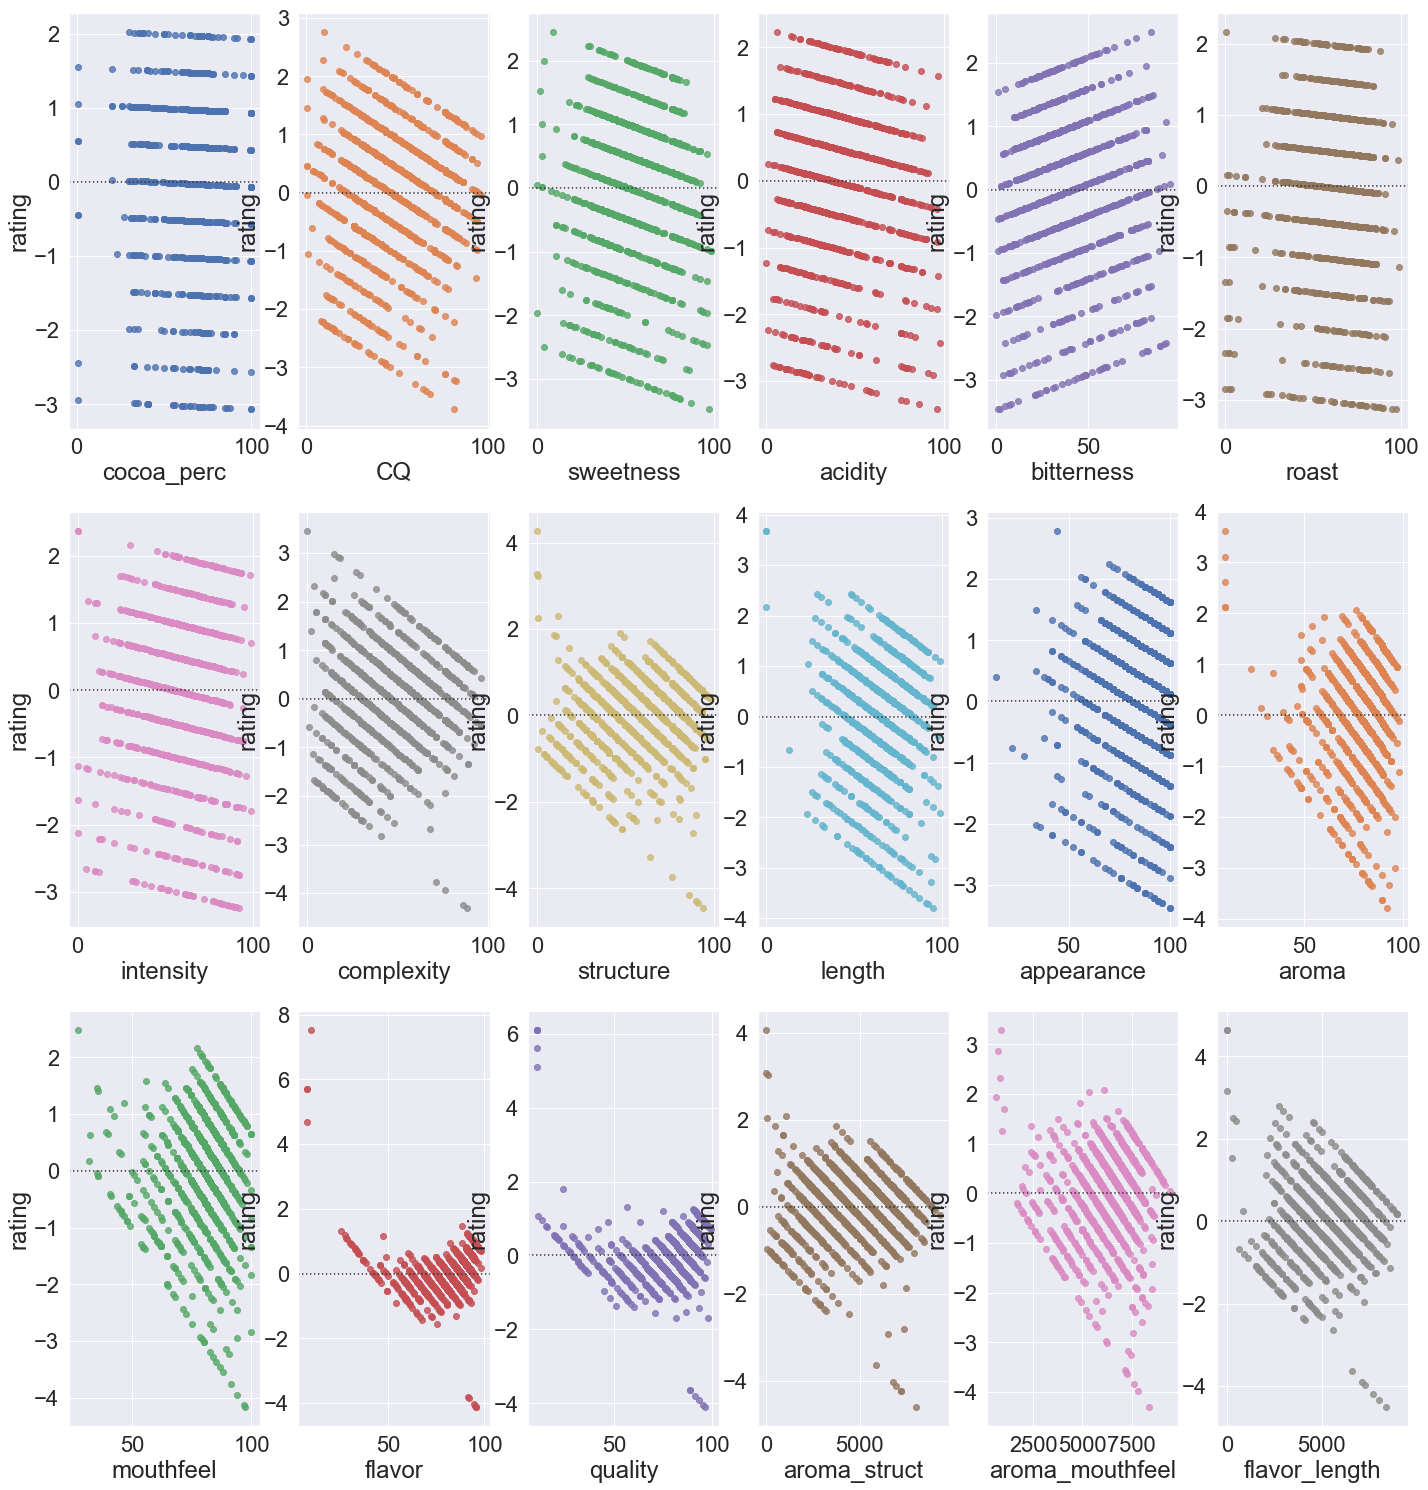

In [22]:
fig, ax = plt.subplots(3, 6, figsize = (24, 26))

for col, ax in zip(df_inter.columns[1:], fig.axes):
    sns.residplot(x=col, y='rating', data=df_inter, ax=ax)

let's model this again

In [23]:
df_inter['log_cocoa_perc'] = np.log(df_inter['cocoa_perc'])
df_inter['log_aroma'] = np.log(df_inter['aroma'])
df_inter['log_mouthfeel'] = np.log(df_inter['mouthfeel'])
df_inter.drop(['cocoa_perc'], axis=1, inplace=True)
df_inter.drop(['aroma'], axis=1, inplace=True)
df_inter.drop(['mouthfeel'], axis=1, inplace=True)

check how it looks now

In [41]:
#build another multi-linear regression model to compare with our baseline
regression = LinearRegression()
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

model_w_log = np.mean(cross_val_score(regression, df_inter.iloc[:,1:], df_inter['rating'], scoring='r2', cv=crossvalidation))
model_w_log

0.8624360434702204

In [42]:
import statsmodels.api as sm
df_inter_sm = sm.add_constant(df_inter.iloc[:,1:])
results = sm.OLS(df_inter['rating'], df_inter_sm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     483.4
Date:                Mon, 22 Apr 2019   Prob (F-statistic):               0.00
Time:                        02:14:47   Log-Likelihood:                -731.38
No. Observations:                1367   AIC:                             1503.
Df Residuals:                    1347   BIC:                             1607.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.4966      1.221      3.682      0.000       2.101       6.893
CQ                  0.0021      0.001      3.339      0.001       0.001       0.003
sweetness           0.0008      0.001      0.900      0.368      -0.001       0.002
acidity             0.0010      0.001      1.647      0.100      -0.000       0.002
bitterness          0.0007      0.001      0.831      0.406      -0.001       0.002
roast              -0.0001      0.001     -0.207      0.836      -0.002       0.001
intensity          -0.0011      0.001     -1.415      0.157      -0.003       0.000
complexity         -0.0353      0.005     -7.243      0.000      -0.045      -0.026
structure          -0.0109      0.004     -2.634      0.009      -0.019      -0.003
length             -0.0262      0.004     -5.889      0.000      -0.035      -0.017
appearance          0.0062      0.001      6.974      0.000       0.004       0.008
flavor              0.0087      0.003      2.689      0.007       0.002       0.015
quality             0.0175      0.001     13.179      0.000       0.015       0.020
aroma_struct        0.0002    5.2e-05      3.651      0.000    8.78e-05       0.000
aroma_mouthfeel     0.0003   4.25e-05      6.866      0.000       0.000       0.000
flavor_length       0.0003   5.53e-05      5.725      0.000       0.000       0.000
flavor_compl        0.0005   5.62e-05      8.024      0.000       0.000       0.001
log_cocoa_perc     -0.0072      0.028     -0.255      0.799      -0.063       0.048
log_aroma          -1.1779      0.147     -7.998      0.000      -1.467      -0.889
log_mouthfeel      -0.2915      0.229     -1.271      0.204      -0.741       0.158
==============================================================================
Omnibus:                     1438.712   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           219892.620
Skew:                          -4.726   Prob(JB):                         0.00
Kurtosis:                      64.411   Cond. No.                     1.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

after interaction baseline = 0.8582567522286493 <br>
after interaction statsmodel R-squared = 0.869 <br>

Although the R^2 has not changed since the interaction, there is a change in the coefficients. Before the logarithmic transformation, the ocefficient for coco_perc was 0.006, but now that we removed that and replace with with log_cocoa_perc, the coefficient changed to -0.006

In [43]:
#change the overall daataframe and put into new csv
# df_inter['log_cocoa_perc'] = np.log(df_inter['cocoa_perc'])
# df_inter.drop(['cocoa_perc'], axis=1, inplace=True)
# #save new intersected dataframe to csv
df_inter.to_csv('inter_choco_rating.csv', index=False)